## **Exploratory Data Analysis**

### **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### **Overview the dataset**

In [2]:
df = pd.read_csv('../data/diabetes_dataset_with_notes.csv')

In [3]:
df.shape

(100000, 17)

We can see that, this dataset has 100,000 rows and 17 columns!!

In [4]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [5]:
df.tail()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0,Elderly patient with increased risk of chronic...
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0,"Obese category, increased risk for diabetes an..."
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0,"Overweight, advised dietary and exercise modif..."
99999,2016,Male,13.0,Wyoming,0,0,0,1,0,0,0,No Info,17.16,5.0,90,0,"Young patient, generally lower risk but needs ..."


In [6]:
df.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes', 'clinical_notes'],
      dtype='object')

In this project, I will remove the `clinical_notes` column because it is not relevant to the scope of the project.

In [7]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### **Explore some columns**

#### **Year**

This data collected diabetes information from 2015 - 2022

In [8]:
years = df['year'].value_counts().sort_index()
years

year
2015     8760
2016     8760
2018     2678
2019    79745
2020       42
2021        7
2022        8
Name: count, dtype: int64

We can see that this dataset peaks dramatically in 2019, with a count of 79,731, which covers approximately 80% of the data. However, I believe this feature can be removed from the dataset, since we only need information from the healthy records and want to disregard technological developments over the years.

#### **Gender**

This data include 3 genders: "Male", "Female", and "Other"

In [9]:
genders = df["gender"].value_counts()
genders

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

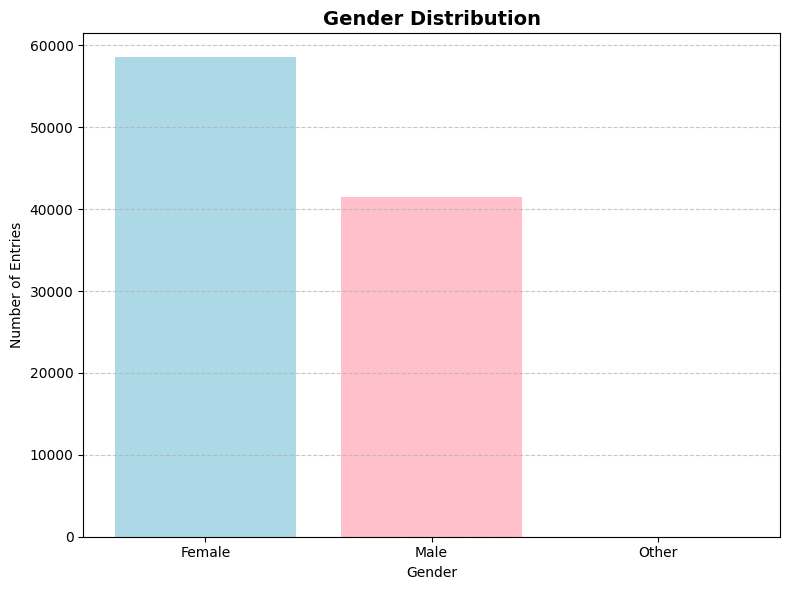

In [10]:
plt.figure(figsize=(8,6))
plt.bar(genders.index, genders.values,color=['#ADD8E6', 'pink', '#CBAACB'])
plt.title("Gender Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Gender")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the chart, we observe that the dataset is imbalanced across the three gender categories: the number of "Female" samples is slightly higher than "Male", while both are significantly larger than "Other". To maintain a consistent distribution between the training and test sets, it is advisable to remove the "Other" category due to its very small representation.

Additionally, since machine learning models typically perform better with numerical inputs, we should convert the categorical gender values into numeric form. A common approach is to apply One-Hot Encoding, which transforms each category into a separate binary feature.

In [11]:
df = df[df["gender"] != "Other"]
df.shape

(99982, 17)

#### **Age**

In [12]:
ages = df["age"].value_counts()
ages

age
80.00    5621
51.00    1619
47.00    1572
48.00    1568
49.00    1541
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

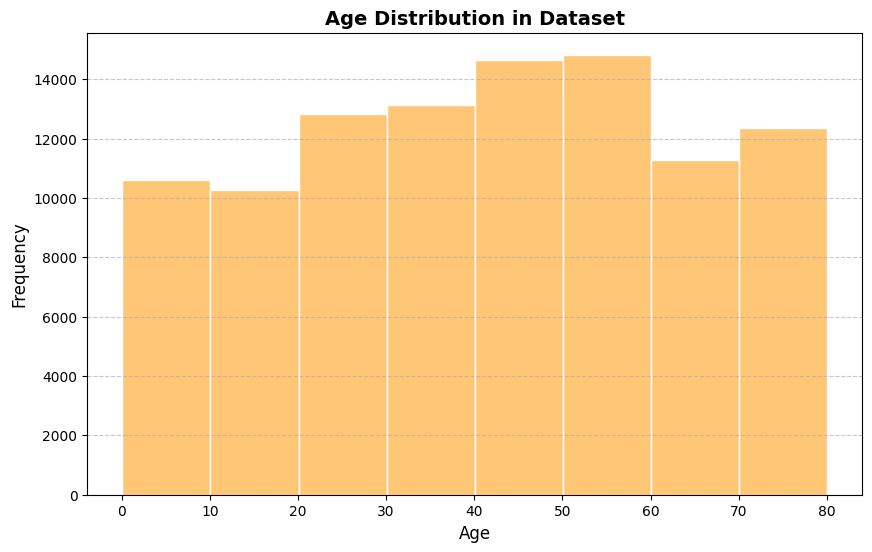

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(
    df["age"], 
    bins=8, 
    kde=False, 
    color="#FFB347",
    edgecolor="white",
)

plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Age Distribution in Dataset", fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The histogram shows that the dataset has a relatively balanced distribution across different age groups. Most age ranges between 20 and 60 years old are well represented, with peaks around the 40–50 and 50–60 groups. The younger population (below 20) and the older population (above 70) have fewer samples compared to the middle-aged groups, but they are still significantly present. Overall, the distribution indicates that the dataset covers a broad spectrum of ages, with the majority concentrated in the working-age population.

#### **Race**

In [14]:
race = df[['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic','race:Other']]

In [15]:
zeros = (race==0).sum()
ones = (race==1).sum()
race_counts = pd.DataFrame({'zero':zeros,'one':ones})
race_counts.index = [
    "African American", 
    "Asian", 
    "Caucasian", 
    "Hispanic", 
    "Other"
]
race_counts

,zero,one
African American,79761,20221
Asian,79969,20013
Caucasian,80115,19867
Hispanic,80097,19885
Other,79986,19996


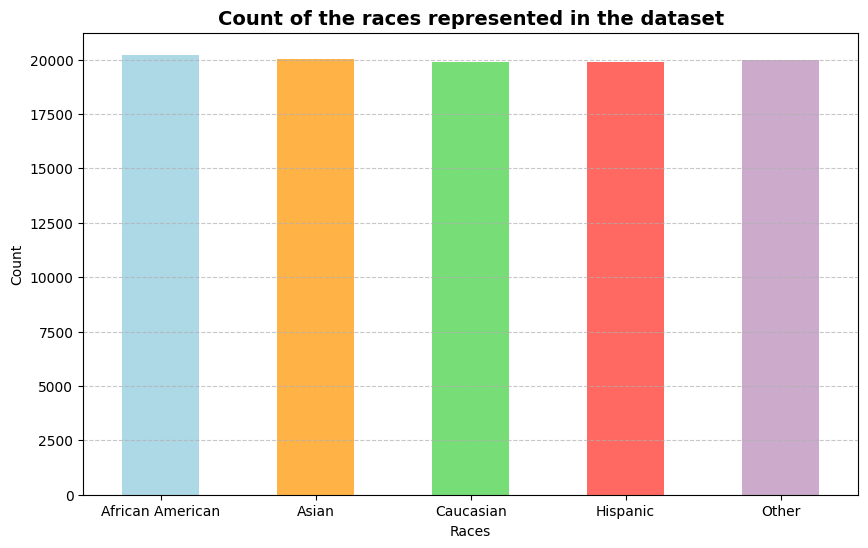

In [16]:
plt.figure(figsize=(10,6))
race_counts['one'].plot(kind='bar',color=['#ADD8E6', '#FFB347', '#77DD77', '#FF6961', '#CBAACB'])
plt.title('Count of the races represented in the dataset', fontsize=14, fontweight="bold")
plt.xticks(rotation=0, fontsize=10)
plt.xlabel('Races')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

The distribution is quite balanced across all groups, with African American, Asian, Caucasian, Hispanic, and Other categories each having close to 20,000 records.

#### **Location**

In [17]:
locations = df["location"].value_counts()
locations

location
Hawaii                  2038
Kentucky                2038
Nebraska                2038
Minnesota               2037
New Jersey              2037
Iowa                    2037
Delaware                2036
Massachusetts           2036
Maine                   2036
Louisiana               2036
District of Columbia    2036
Georgia                 2036
Arkansas                2036
Kansas                  2036
Illinois                2036
Michigan                2036
Oregon                  2036
Pennsylvania            2036
Florida                 2035
Maryland                2035
Colorado                2035
Alabama                 2035
Connecticut             2035
Rhode Island            2035
Mississippi             2035
New Hampshire           2035
New York                2035
Missouri                2034
Alaska                  2033
North Dakota            2033
Montana                 2033
North Carolina          2033
South Dakota            2033
New Mexico              2032
Idaho

Virgin Islands, Wisconsin and Wyoming have lesser entires as compared to other locations. We can combine these to one location named "Others".

#### **Hypertension**

In [18]:
hypertension = df["hypertension"].value_counts()
hypertension.index=['No Hypertension', 'Have Hypertension']
hypertension

No Hypertension      92497
Have Hypertension     7485
Name: count, dtype: int64

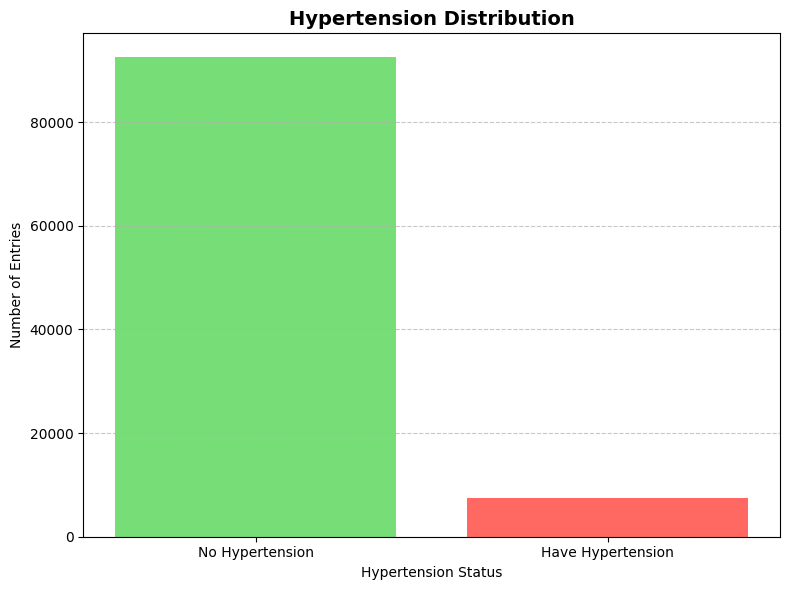

In [19]:
plt.figure(figsize=(8,6))
plt.bar(hypertension.index, hypertension.values,color=['#77DD77', '#FF6961'])
plt.title("Hypertension Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Hypertension Status")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can see that, most of the people do not have hypertension.

#### **Heart Disease**

In [20]:
heart_disease = df['heart_disease'].value_counts()
heart_disease.index=['No Heart Disease', 'Have Heart Disease']
heart_disease


No Heart Disease      96040
Have Heart Disease     3942
Name: count, dtype: int64

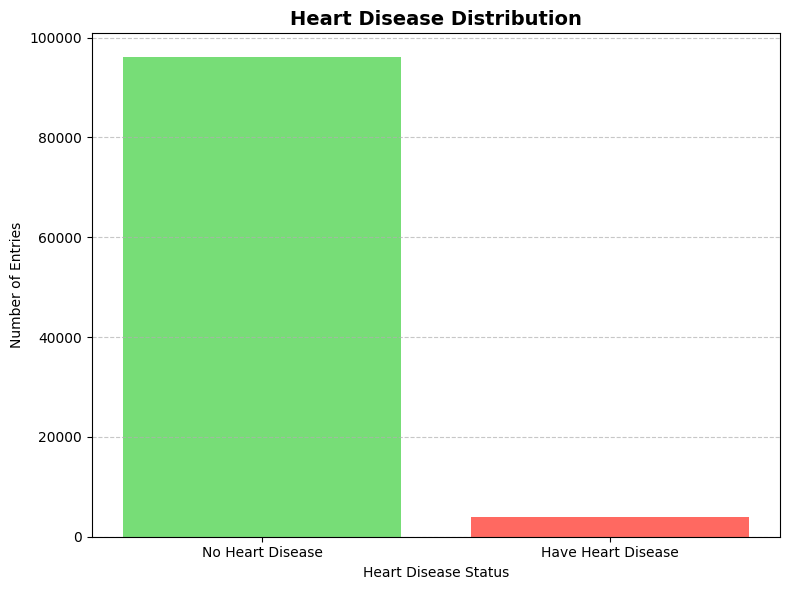

In [21]:
plt.figure(figsize=(8,6))
plt.bar(heart_disease.index, heart_disease.values,color=['#77DD77', '#FF6961'])
plt.title("Heart Disease Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Heart Disease Status")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can see that, most of the people do not have heart disease.

#### **Smoking History**

In [22]:
smoke = df['smoking_history'].value_counts()
smoke

smoking_history
No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: count, dtype: int64

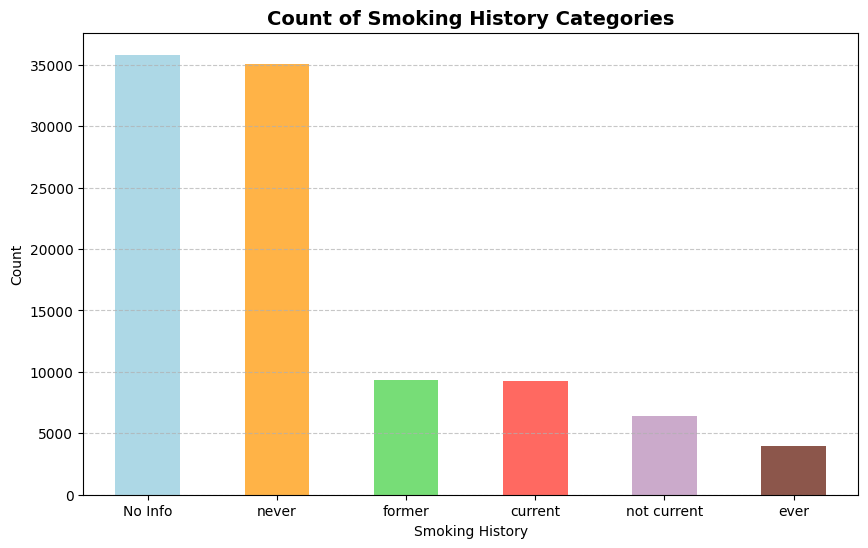

In [23]:
plt.figure(figsize=(10,6))
smoke.plot(kind='bar',color=['#ADD8E6', '#FFB347', '#77DD77', '#FF6961', '#CBAACB', '#8c564b'])
plt.title('Count of Smoking History Categories', fontsize=14, fontweight="bold")
plt.xticks(rotation=0, fontsize=10)
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In this feature, the “No Info” category has the highest count (over 35,000). This indicates a large portion of missing information regarding individuals’ smoking history. Since such a high level of missing data can reduce the reliability and usefulness of this feature, it would be reasonable to remove it from further analysis.

#### **BMI**

In [24]:
bmi = df["bmi"].value_counts()
bmi

bmi
27.32    25488
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
64.27        1
64.26        1
47.85        1
45.04        1
58.09        1
Name: count, Length: 4247, dtype: int64

In [25]:
adults = df[df['age'] >= 20] 
children = df[df['age'] < 20]

For adults, BMI is interpreted the same way for men and women of all ages. The categories are:
- Underweight: BMI < 18.5   
- Normal weight: 18.5 ≤ BMI < 24.9
- Overweight: 25.0 ≤ BMI < 29.9
- Obesity (Class I): 30.0 ≤ BMI < 34.9
- Obesity (Class II): 35.0 ≤ BMI < 39.9
- Obesity (Class III / Severe): BMI ≥ 40.0

In [26]:
underweight_adult = adults[adults['bmi'] < 18.5].bmi.count()
normal_adult = adults[(adults['bmi'] >= 18.5) & (adults['bmi'] < 25)].bmi.count()
overweight_adult = adults[(adults['bmi'] >= 25) & (adults['bmi'] < 30)].bmi.count()
obese_adult = adults[adults['bmi'] >=30].bmi.count()

In [27]:
print("Underweight: ",underweight_adult)
print("Normal weight: ",normal_adult)
print("Overweight: ",overweight_adult)
print("Obese: ",obese_adult)

Underweight:  931
Normal weight:  16349
Overweight:  40532
Obese:  22509


In [28]:
class1_Obese = adults[(adults['bmi'] >= 30) & (adults['bmi'] < 35)].bmi.count()
class2_Obese = adults[(adults['bmi'] >= 35) & (adults['bmi'] < 40)].bmi.count()
class3_Obese = adults[adults['bmi'] >= 40].bmi.count()
print('Class1 Obese count: ',class1_Obese)
print('Class2 Obese count: ',class2_Obese)
print('Class3 Obese count: ',class3_Obese)

Class1 Obese count:  12132
Class2 Obese count:  5906
Class3 Obese count:  4471


For children and adolescents, BMI is age- and sex-specific and is expressed as a percentile based on growth charts (CDC or WHO).
- Underweight: BMI < 5th percentile
- Normal weight: 5th percentile ≤ BMI < 85th percentile
- Overweight: 85th percentile ≤ BMI < 95th percentile
- Obesity: BMI ≥ 95th percentile

In [29]:
def years_to_years_months(age_years: float):
    """
    Convert age in float years into (years, months).
    Example: 5.5 -> (5, 6)
             10.25 -> (10, 3)
    """
    if age_years is None:
        return None
    
    years = int(age_years)  # whole years
    months = int(round((age_years - years) * 12))  # convert decimal to months
    
    return f"{years}-{months}"

In [30]:
children.loc[:, 'age_scaled'] = (
    children['age'].apply(lambda x: years_to_years_months(x) if pd.notna(x) else pd.NA)
)

In [31]:
import pandas as pd

bmi_percentile = pd.DataFrame([
    # age,   sex,      p5,    p85,   p95
    ("0-0",  "Male", 11.5, 14.8, 15.8),
    ("0-1",  "Male", 12.8, 16.4, 17.3),
    ("0-2",  "Male", 13.8, 17.3, 17.8),
    ("0-3",  "Male", 14.7, 18.5, 19.4),
    ("0-4",  "Male", 15.0, 18.7, 19.7),
    ("0-5",  "Male", 15.1, 18.9, 19.8),
    ("0-6",  "Male", 15.2, 18.9, 19.9),
    ("0-7",  "Male", 15.2, 18.9, 19.9),
    ("0-8",  "Male", 15.1, 18.8, 19.8),
    ("0-9",  "Male", 15.1, 18.7, 19.7),
    ("0-10", "Male", 15.0, 18.6, 19.5),
    ("0-11", "Male", 14.9, 18.4, 19.4),
    
    ("1-0",  "Male", 14.8, 18.3, 19.3),
    ("1-1",  "Male", 14.7, 18.1, 19.1),
    ("1-2",  "Male", 14.6, 18.0, 19.0),
    ("1-3",  "Male", 14.5, 17.9, 18.9),
    ("1-4",  "Male", 14.5, 17.8, 18.7),
    ("1-5",  "Male", 14.3, 18.6, 18.9),
    ("1-6",  "Male", 14.2, 17.5, 18.5),
    ("1-7",  "Male", 14.2, 17.4, 18.4),
    ("1-8",  "Male", 14.1, 17.4, 18.6),
    ("1-9",  "Male", 14.1, 17.3, 18.3),
    ("1-10", "Male", 14.0, 17.2, 18.1),
    ("1-11", "Male", 13.9, 17.1, 18.0),
    
    ("2-0",  "Male", 14.2, 17.4, 18.3),
    ("2-1",  "Male", 14.1, 17.4, 18.3),
    ("2-2",  "Male", 14.1, 17.3, 18.2),
    ("2-3",  "Male", 14.0, 17.2, 18.2),
    ("2-4",  "Male", 14.0, 17.2, 18.1),
    ("2-5",  "Male", 13.9, 17.2, 18.2),
    ("2-6",  "Male", 13.9, 17.2, 18.0),
    ("2-7",  "Male", 13.9, 17.1, 18.0),
    ("2-8",  "Male", 13.8, 17.1, 18.0),
    ("2-9",  "Male", 13.8, 17.0, 18.0),
    ("2-10", "Male", 13.8, 17.0, 17.9),
    ("2-11", "Male", 13.7, 17.0, 17.9),
    
    ("3-0",  "Male", 13.7, 17.0, 17.9),
    ("3-1",  "Male", 13.7, 16.9, 17.8),
    ("3-2",  "Male", 13.6, 16.9, 17.8),
    ("3-3",  "Male", 13.6, 16.9, 17.8),
    ("3-4",  "Male", 13.6, 16.9, 17.7),
    ("3-5",  "Male", 13.6, 16.9, 17.7),
    ("3-6",  "Male", 13.6, 16.8, 17.7),
    ("3-7",  "Male", 13.5, 16.8, 17.7),
    ("3-8",  "Male", 13.5, 16.8, 17.7),
    ("3-9",  "Male", 13.5, 16.8, 17.7),
    ("3-10", "Male", 13.5, 16.8, 17.6),
    ("3-11", "Male", 13.5, 16.7, 17.6),
    
    ("4-0",  "Male", 13.4, 16.7, 17.6),
    ("4-1",  "Male", 13.4, 16.7, 17.6),
    ("4-2",  "Male", 13.4, 16.7, 17.6),
    ("4-3",  "Male", 13.4, 16.7, 17.6),
    ("4-4",  "Male", 13.4, 16.7, 17.6),
    ("4-5",  "Male", 13.3, 16.7, 17.6),
    ("4-6",  "Male", 13.3, 16.7, 17.6),
    ("4-7",  "Male", 13.3, 16.7, 17.6),
    ("4-8",  "Male", 13.3, 16.7, 17.6),
    ("4-9",  "Male", 13.3, 16.7, 17.6),
    ("4-10", "Male", 13.2, 16.7, 17.6),
    ("4-11", "Male", 13.2, 16.7, 17.6),
    
    ("5-0",  "Male", 13.2, 16.7, 17.7),
    ("5-1",  "Male", 13.4, 16.7, 17.7),
    ("5-2",  "Male", 13.4, 16.7, 17.7),
    ("5-3",  "Male", 13.4, 16.7, 17.7),
    ("5-4",  "Male", 13.4, 16.7, 17.7),
    ("5-5",  "Male", 13.4, 16.7, 17.7),
    ("5-6",  "Male", 13.4, 16.7, 17.7),
    ("5-7",  "Male", 13.4, 16.7, 17.7),
    ("5-8",  "Male", 13.4, 16.8, 17.8),
    ("5-9",  "Male", 13.4, 16.8, 17.8),
    ("5-10",  "Male", 13.4, 16.8, 17.8),
    ("5-11",  "Male", 13.4, 16.8, 17.8),
    
    ("6-0",  "Male", 13.4, 16.8, 17.9),
    ("6-1",  "Male", 13.4, 16.8, 17.9),
    ("6-2",  "Male", 13.4, 16.9, 17.9),
    ("6-3",  "Male", 13.4, 16.9, 17.9),
    ("6-4",  "Male", 13.4, 16.9, 18.0),
    ("6-5",  "Male", 13.4, 16.9, 18.0),
    ("6-6",  "Male", 13.4, 16.9, 18.0),
    ("6-7",  "Male", 13.4, 17.0, 18.1),
    ("6-8",  "Male", 13.5, 17.0, 18.1),
    ("6-9",  "Male", 13.5, 17.0, 18.1),
    ("6-10",  "Male", 13.5, 17.1, 18.2),
    ("6-11",  "Male", 13.5, 17.1, 18.2),
    
    ("7-0",  "Male", 13.5, 17.1, 18.3),
    ("7-1",  "Male", 13.5, 17.1, 18.3),
    ("7-2",  "Male", 13.5, 17.2, 18.3),
    ("7-3",  "Male", 13.5, 17.2, 18.4),
    ("7-4",  "Male", 13.6, 17.2, 18.4),
    ("7-5",  "Male", 13.6, 17.3, 18.5),
    ("7-6",  "Male", 13.6, 17.3, 18.5),
    ("7-7",  "Male", 13.6, 17.3, 18.6),
    ("7-8",  "Male", 13.6, 17.4, 18.6),
    ("7-9",  "Male", 13.6, 17.4, 18.7),
    ("7-10",  "Male", 13.6, 17.4, 18.7),
    ("7-11",  "Male", 13.7, 17.5, 18.8),
    
    ("8-0",  "Male", 13.7, 17.5, 18.8),
    ("8-1",  "Male", 13.7, 17.5, 18.9),
    ("8-2",  "Male", 13.7, 17.6, 18.9),
    ("8-3",  "Male", 13.7, 17.6, 19.0),
    ("8-4",  "Male", 13.7, 17.7, 19.0),
    ("8-5",  "Male", 13.7, 17.7, 19.1),
    ("8-6",  "Male", 13.8, 17.7, 19.1),
    ("8-7",  "Male", 13.8, 17.8, 19.2),
    ("8-8",  "Male", 13.8, 17.8, 19.2),
    ("8-9",  "Male", 13.8, 17.9, 19.3),
    ("8-10",  "Male", 13.8, 17.9, 19.3),
    ("8-11",  "Male", 13.8, 17.9, 19.4),
    
    ("9-0",  "Male", 13.9, 18.0, 19.5),
    ("9-1",  "Male", 13.9, 18.0, 19.5),
    ("9-2",  "Male", 13.9, 18.1, 19.6),
    ("9-3",  "Male", 13.9, 18.1, 19.6),
    ("9-4",  "Male", 13.9, 18.2, 19.7),
    ("9-5",  "Male", 14.0, 18.2, 19.8),
    ("9-6",  "Male", 14.0, 18.3, 19.8),
    ("9-7",  "Male", 14.0, 18.3, 19.9),
    ("9-8",  "Male", 14.0, 18.4, 20.0),
    ("9-9",  "Male", 14.1, 18.4, 20.0),
    ("9-10",  "Male", 14.1, 18.5, 20.1),
    ("9-11",  "Male", 14.1, 18.5, 20.2),
    
    ("10-0",  "Male", 14.1, 18.6, 20.2),
    ("10-1",  "Male", 14.2, 18.6, 20.3),
    ("10-2",  "Male", 14.2, 18.7, 20.4),
    ("10-3",  "Male", 14.2, 18.7, 20.4),
    ("10-4",  "Male", 14.2, 18.8, 20.5),
    ("10-5",  "Male", 14.3, 18.8, 20.6),
    ("10-6",  "Male", 14.3, 18.9, 20.7),
    ("10-7",  "Male", 14.3, 19.0, 20.7),
    ("10-8",  "Male", 14.3, 19.0, 20.8),
    ("10-9",  "Male", 14.4, 19.1, 20.9),
    ("10-10",  "Male", 14.4, 19.1, 21.0),
    ("10-11",  "Male", 14.4, 19.2, 21.0),
    
    ("11-0", "Male", 14.5, 19.2, 21.1),
    ("11-1", "Male", 14.5, 19.3, 21.2),
    ("11-2", "Male", 14.5, 19.4, 21.3),
    ("11-3", "Male", 14.6, 19.4, 21.4),
    ("11-4", "Male", 14.6, 19.5, 21.4),
    ("11-5", "Male", 14.6, 19.6, 21.5),
    ("11-6", "Male", 14.7, 19.6, 21.6),
    ("11-7", "Male", 14.7, 19.7, 21.7),
    ("11-8", "Male", 14.7, 19.8, 21.8),
    ("11-9", "Male", 14.8, 19.8, 21.8),
    ("11-10", "Male", 14.8, 19.9, 21.9),
    ("11-11", "Male", 14.9, 20.0, 22.0),
    
    ("12-0", "Male", 14.9, 20.1, 22.1),
    ("12-1", "Male", 14.9, 20.1, 22.2),
    ("12-2", "Male", 15.0, 20.2, 22.3),
    ("12-3", "Male", 15.0, 20.3, 22.3),
    ("12-4", "Male", 15.1, 20.3, 22.4),
    ("12-5", "Male", 15.1, 20.4, 22.5),
    ("12-6", "Male", 15.1, 20.5, 22.6),
    ("12-7", "Male", 15.2, 20.6, 22.7),
    ("12-8", "Male", 15.2, 20.6, 22.8),
    ("12-9", "Male", 15.3, 20.7, 22.9),
    ("12-10", "Male", 15.3, 20.8, 23.0),
    ("12-11", "Male", 15.4, 20.9, 23.1),
    
    ("13-0", "Male", 15.4, 20.9, 23.2),
    ("13-1", "Male", 15.4, 21.0, 23.3),
    ("13-2", "Male", 15.5, 21.1, 23.4),
    ("13-3", "Male", 15.5, 21.2, 23.4),
    ("13-4", "Male", 15.6, 21.3, 23.5),
    ("13-5", "Male", 15.6, 21.3, 23.6),
    ("13-6", "Male", 15.7, 21.4, 23.7),
    ("13-7", "Male", 15.7, 21.5, 23.8),
    ("13-8", "Male", 15.8, 21.6, 23.9),
    ("13-9", "Male", 15.8, 21.7, 24.0),
    ("13-10", "Male", 15.9, 21.7, 24.0),
    ("13-11", "Male", 15.9, 21.8, 24.1),
    
    ("14-0", "Male", 16.0, 21.9, 24.2),
    ("14-1", "Male", 16.0, 22.0, 24.3),
    ("14-2", "Male", 16.1, 22.1, 24.4),
    ("14-3", "Male", 16.1, 22.1, 24.5),
    ("14-4", "Male", 16.2, 22.2, 24.6),
    ("14-5", "Male", 16.2, 22.3, 24.7),
    ("14-6", "Male", 16.3, 22.4, 24.7),
    ("14-7", "Male", 16.3, 22.4, 24.8),
    ("14-8", "Male", 16.4, 22.5, 24.9),
    ("14-9", "Male", 16.4, 22.6, 25.0),
    ("14-10", "Male", 16.5, 22.7, 25.1),
    ("14-11", "Male", 16.5, 22.7, 25.1),
    
    ("15-0", "Male", 16.5, 22.8, 25.2),
    ("15-1", "Male", 16.6, 22.9, 25.3),
    ("15-2", "Male", 16.6, 23.0, 25.4),
    ("15-3", "Male", 16.7, 23.0, 25.5),
    ("15-4", "Male", 16.7, 23.1, 25.5),
    ("15-5", "Male", 16.8, 23.2, 25.6),
    ("15-6", "Male", 16.8, 23.2, 25.7),
    ("15-7", "Male", 16.9, 23.3, 25.8),
    ("15-8", "Male", 16.9, 23.4, 25.9),
    ("15-9", "Male", 17.0, 23.5, 25.9),
    ("15-10", "Male", 17.0, 23.5, 26.0),
    ("15-11", "Male", 17.0, 23.6, 26.1),
    
    ("16-0", "Male", 17.1, 23.7, 26.1),
    ("16-1", "Male", 17.1, 23.7, 26.2),
    ("16-2", "Male", 17.2, 23.8, 26.3),
    ("16-3", "Male", 17.2, 23.9, 26.3),
    ("16-4", "Male", 17.2, 23.9, 26.4),
    ("16-5", "Male", 17.3, 24.0, 26.5),
    ("16-6", "Male", 17.3, 24.0, 26.5),
    ("16-7", "Male", 17.4, 24.1, 26.6),
    ("16-8", "Male", 17.4, 24.2, 26.7),
    ("16-9", "Male", 17.4, 24.2, 26.7),
    ("16-10", "Male", 17.5, 24.3, 26.8),
    ("16-11", "Male", 17.5, 24.3, 26.8),
    
    ("17-0", "Male", 17.5, 24.4, 26.9),
    ("17-1", "Male", 17.6, 24.5, 27.0),
    ("17-2", "Male", 17.6, 24.5, 27.0),
    ("17-3", "Male", 17.6, 24.6, 27.1),
    ("17-4", "Male", 17.7, 24.6, 27.1),
    ("17-5", "Male", 17.7, 24.7, 27.2),
    ("17-6", "Male", 17.7, 24.7, 27.2),
    ("17-7", "Male", 17.8, 24.8, 27.3),
    ("17-8", "Male", 17.8, 24.8, 27.3),
    ("17-9", "Male", 17.9, 24.9, 27.4),
    ("17-10","Male", 17.9, 24.9, 27.4),
    ("17-11","Male", 17.9, 25.0, 27.5),
    
    ("18-0", "Male", 17.9, 25.0, 27.5),
    ("18-1", "Male", 18.0, 25.1, 27.6),
    ("18-2", "Male", 18.0, 25.1, 27.6),
    ("18-3", "Male", 18.0, 25.2, 27.7),
    ("18-4", "Male", 18.0, 25.2, 27.7),
    ("18-5", "Male", 18.1, 25.3, 27.8),
    ("18-6", "Male", 18.1, 25.3, 27.8),
    ("18-7", "Male", 18.1, 25.4, 27.9),
    ("18-8", "Male", 18.1, 25.4, 27.9),
    ("18-9", "Male", 18.2, 25.5, 28.0),
    ("18-10","Male", 18.2, 25.5, 28.0),
    ("18-11","Male", 18.2, 25.5, 28.1),
    
    ("19-0", "Male", 18.2, 25.6, 28.1),
    
    ("0-0",  "Female", 11.5, 14.7, 15.5),
    ("0-1",  "Female", 12.4, 15.5, 16.1),
    ("0-2",  "Female", 13.5, 16.8, 17.4),
    ("0-3",  "Female", 14.0, 17.4, 18.0),
    ("0-4",  "Female", 14.3, 17.7, 18.3),
    ("0-5",  "Female", 14.5, 17.9, 18.5),
    ("0-6",  "Female", 14.6, 18.0, 18.6),
    ("0-7",  "Female", 14.6, 18.0, 18.6),
    ("0-8",  "Female", 14.5, 17.8, 18.4),
    ("0-9",  "Female", 14.5, 17.8, 18.4),
    ("0-10", "Female", 14.5, 17.7, 18.2),
    ("0-11", "Female", 14.4, 17.5, 18.1),
    
    ("1-0",  "Female", 14.4, 17.4, 17.9),
    ("1-1",  "Female", 14.4, 17.2, 17.8),
    ("1-2",  "Female", 14.3, 17.2, 17.7),
    ("1-3",  "Female", 14.2, 17.0, 17.5),
    ("1-4",  "Female", 14.2, 16.8, 17.4),
    ("1-5",  "Female", 14.1, 16.8, 17.3),
    ("1-6",  "Female", 14.0, 16.7, 17.2),
    ("1-7",  "Female", 13.9, 16.6, 17.2),
    ("1-8",  "Female", 13.9, 16.6, 17.2),
    ("1-9",  "Female", 13.8, 16.5, 17.0),
    ("1-10", "Female", 13.7, 16.4, 16.9),
    ("1-11", "Female", 13.5, 16.4, 16.9),
    
    ("2-0",  "Female", 13.7, 17.2, 18.1),
    ("2-1",  "Female", 13.7, 17.2, 18.1),
    ("2-2",  "Female", 13.7, 17.2, 18.1),
    ("2-3",  "Female", 13.6, 17.1, 18.1),
    ("2-4",  "Female", 13.6, 17.0, 18.0),
    ("2-5",  "Female", 13.6, 17.0, 18.0),
    ("2-6",  "Female", 13.6, 17.0, 18.0),
    ("2-7",  "Female", 13.6, 17.0, 18.0),
    ("2-8",  "Female", 13.5, 16.9, 17.9),
    ("2-9",  "Female", 13.5, 16.9, 17.9),
    ("2-10", "Female", 13.5, 16.9, 17.9),
    ("2-11", "Female", 13.5, 16.9, 17.9),
    
    ("3-0",  "Female", 13.5, 16.9, 17.9),
    ("3-1",  "Female", 13.4, 16.8, 17.8),
    ("3-2",  "Female", 13.4, 16.8, 17.8),
    ("3-3",  "Female", 13.4, 16.8, 17.8),
    ("3-4",  "Female", 13.4, 16.7, 17.7),
    ("3-5",  "Female", 13.4, 16.7, 17.7),
    ("3-6",  "Female", 13.3, 16.7, 17.7),
    ("3-7",  "Female", 13.3, 16.7, 17.8),
    ("3-8",  "Female", 13.3, 16.7, 17.8),
    ("3-9",  "Female", 13.3, 16.7, 17.8),
    ("3-10","Female", 13.2, 16.7, 17.8),
    ("3-11","Female", 13.2, 16.7, 17.9),
    
    ("4-0",  "Female", 13.2, 16.7, 17.9),
    ("4-1",  "Female", 13.2, 16.7, 17.9),
    ("4-2",  "Female", 13.2, 16.7, 17.9),
    ("4-3",  "Female", 13.2, 16.7, 17.9),
    ("4-4",  "Female", 13.2, 16.7, 17.9),
    ("4-5",  "Female", 13.2, 16.7, 17.9),
    ("4-6",  "Female", 13.1, 16.7, 17.9),
    ("4-7",  "Female", 13.1, 16.7, 18.0),
    ("4-8",  "Female", 13.1, 16.7, 18.0),
    ("4-9",  "Female", 13.1, 16.7, 18.0),
    ("4-10","Female", 13.1, 16.7, 18.0),
    ("4-11","Female", 13.1, 16.7, 18.1),
    
    ("5-0",  "Female", 13.1, 16.9, 18.1),
    ("5-1", "Female", 13.1, 16.9, 18.1),
    ("5-2", "Female", 13.1, 16.9, 18.1),
    ("5-3", "Female", 13.1, 17.0, 18.2),
    ("5-4", "Female", 13.1, 17.0, 18.2),
    ("5-5", "Female", 13.1, 17.0, 18.2),
    ("5-6", "Female", 13.1, 17.0, 18.2),
    ("5-7", "Female", 13.1, 17.0, 18.2),
    ("5-8", "Female", 13.1, 17.0, 18.3),
    ("5-9", "Female", 13.1, 17.0, 18.3),
    ("5-10", "Female", 13.1, 17.0, 18.3),
    ("5-11", "Female", 13.1, 17.0, 18.3),
    
    ("6-0", "Female", 13.1, 17.1, 18.4),
    ("6-1", "Female", 13.1, 17.1, 18.4),
    ("6-2", "Female", 13.1, 17.1, 18.5),
    ("6-3", "Female", 13.1, 17.1, 18.5),
    ("6-4", "Female", 13.1, 17.2, 18.6),
    ("6-5", "Female", 13.1, 17.2, 18.6),
    ("6-6", "Female", 13.1, 17.2, 18.6),
    ("6-7", "Female", 13.1, 17.2, 18.6),
    ("6-8", "Female", 13.2, 17.3, 18.7),
    ("6-9", "Female", 13.2, 17.3, 18.7),
    ("6-10","Female", 13.2, 17.3, 18.7),
    ("6-11","Female", 13.2, 17.3, 18.7),
    
    ("7-0", "Female", 13.2, 17.4, 18.8),
    ("7-1", "Female", 13.2, 17.4, 18.9),
    ("7-2", "Female", 13.2, 17.4, 18.9),
    ("7-3", "Female", 13.2, 17.5, 19.0),
    ("7-4", "Female", 13.2, 17.5, 19.1),
    ("7-5", "Female", 13.2, 17.5, 19.1),
    ("7-6", "Female", 13.2, 17.6, 19.1),
    ("7-7", "Female", 13.2, 17.6, 19.2),
    ("7-8", "Female", 13.2, 17.6, 19.2),
    ("7-9", "Female", 13.3, 17.7, 19.3),
    ("7-10","Female", 13.3, 17.7, 19.3),
    ("7-11","Female", 13.3, 17.8, 19.4),
    
    ("8-0", "Female", 13.3, 17.8, 19.4),
    ("8-1", "Female", 13.3, 17.9, 19.5),
    ("8-2", "Female", 13.3, 17.9, 19.6),
    ("8-3", "Female", 13.4, 18.0, 19.6),
    ("8-4", "Female", 13.4, 18.0, 19.7),
    ("8-5", "Female", 13.4, 18.1, 19.8),
    ("8-6", "Female", 13.4, 18.1, 19.8),
    ("8-7", "Female", 13.4, 18.2, 19.9),
    ("8-8", "Female", 13.5, 18.2, 20.0),
    ("8-9", "Female", 13.5, 18.3, 20.0),
    ("8-10","Female", 13.5, 18.3, 20.1),
    ("8-11","Female", 13.5, 18.4, 20.2),
    
    ("9-0", "Female", 13.6, 18.4, 20.2),
    ("9-1", "Female", 13.6, 18.5, 20.3),
    ("9-2", "Female", 13.6, 18.5, 20.3),
    ("9-3", "Female", 13.6, 18.6, 20.5),
    ("9-4",  "Female", 13.7, 18.7, 20.5),
    ("9-5",  "Female", 13.7, 18.7, 20.6),
    ("9-6",  "Female", 13.7, 18.8, 20.7),
    ("9-7",  "Female", 13.8, 18.8, 20.8),
    ("9-8",  "Female", 13.8, 18.9, 20.9),
    ("9-9",  "Female", 13.9, 19.0, 21.0),
    ("9-10", "Female", 13.9, 19.0, 21.0),
    ("9-11", "Female", 13.9, 19.1, 21.1),
    
    ("10-0", "Female", 13.9, 19.1, 21.1),
    ("10-1", "Female", 14.0, 19.2, 21.2),
    ("10-2", "Female", 14.0, 19.3, 21.3),
    ("10-3", "Female", 14.0, 19.3, 21.3),
    ("10-4", "Female", 14.1, 19.4, 21.4),
    ("10-5", "Female", 14.1, 19.5, 21.5),
    ("10-6", "Female", 14.1, 19.5, 21.6),
    ("10-7", "Female", 14.2, 19.6, 21.7),
    ("10-8", "Female", 14.2, 19.7, 21.8),
    ("10-9", "Female", 14.2, 19.8, 21.9),
    ("10-10","Female", 14.3, 19.8, 22.0),
    ("10-11","Female", 14.3, 19.9, 22.1),
    
    ("11-0", "Female", 14.3, 20.0, 22.2),
    ("11-1", "Female", 14.4, 20.0, 22.3),
    ("11-2", "Female", 14.5, 20.1, 22.3),
    ("11-3", "Female", 14.5, 20.2, 22.4),
    ("11-4", "Female", 14.5, 20.3, 22.5),
    ("11-5", "Female", 14.6, 20.4, 22.6),
    ("11-6", "Female", 14.6, 20.4, 22.7),
    ("11-7", "Female", 14.7, 20.5, 22.8),
    ("11-8", "Female", 14.7, 20.6, 22.9),
    ("11-9", "Female", 14.8, 20.7, 23.0),
    ("11-10","Female", 14.8, 20.8, 23.1),
    ("11-11","Female", 14.9, 20.8, 23.2),
    
    ("12-0", "Female", 14.9, 20.9, 23.3),
    ("12-1", "Female", 15.0, 21.0, 23.4),
    ("12-2", "Female", 15.0, 21.1, 23.5),
    ("12-3", "Female", 15.1, 21.2, 23.6),
    ("12-4", "Female", 15.1, 21.2, 23.7),
    ("12-5", "Female", 15.1, 21.3, 23.8),
    ("12-6", "Female", 15.2, 21.4, 23.9),
    ("12-7", "Female", 15.2, 21.5, 23.9),
    ("12-8", "Female", 15.3, 21.6, 24.0),
    ("12-9", "Female", 15.3, 21.7, 24.1),
    ("12-10","Female", 15.4, 21.8, 24.2),
    ("12-11","Female", 15.4, 21.8, 24.3),
    
    ("13-0", "Female", 15.5, 21.9, 24.4),
    ("13-1", "Female", 15.5, 22.0, 24.5),
    ("13-2", "Female", 15.6, 22.1, 24.6),
    ("13-3", "Female", 15.6, 22.2, 24.7),
    ("13-4", "Female", 15.7, 22.3, 24.8),
    ("13-5", "Female", 15.7, 22.3, 24.9),
    ("13-6", "Female", 15.8, 22.4, 25.0),
    ("13-7", "Female", 15.8, 22.5, 25.1),
    ("13-8", "Female", 15.9, 22.6, 25.1),
    ("13-9", "Female", 15.9, 22.7, 25.3),
    ("13-10","Female", 15.9, 22.7, 25.3),
    ("13-11","Female", 16.0, 22.8, 25.4),
    
    ("14-0", "Female", 16.0, 22.9, 25.5),
    ("14-1", "Female", 16.1, 23.0, 25.6),
    ("14-2", "Female", 16.1, 23.0, 25.6),
    ("14-3", "Female", 16.2, 23.1, 25.7),
    ("14-4", "Female", 16.2, 23.1, 25.7),
    ("14-5", "Female", 16.2, 23.2, 25.8),
    ("14-6", "Female", 16.2, 23.2, 25.9),
    ("14-7", "Female", 16.3, 23.4, 26.0),
    ("14-8", "Female", 16.4, 23.4, 26.1),
    ("14-9", "Female", 16.4, 23.5, 26.2),
    ("14-10","Female", 16.4, 23.5, 26.2),
    ("14-11","Female", 16.5, 23.6, 26.3),
    
    ("15-0", "Female", 16.5, 23.7, 26.4),
    ("15-1", "Female", 16.6, 23.8, 26.5),
    ("15-2", "Female", 16.6, 23.8, 26.5),
    ("15-3", "Female", 16.6, 23.8, 26.5),
    ("15-4", "Female", 16.6, 23.9, 26.6),
    ("15-5", "Female", 16.6, 23.9, 26.7),
    ("15-6", "Female", 16.7, 24.0, 26.7),
    ("15-7", "Female", 16.7, 24.0, 26.8),
    ("15-8", "Female", 16.8, 24.1, 26.8),
    ("15-9", "Female", 16.8, 24.1, 26.8),
    ("15-10","Female", 16.8, 24.2, 26.9),
    ("15-11","Female", 16.8, 24.2, 26.9),
    
    ("16-0", "Female", 16.9, 24.2, 27.0),
    ("16-1", "Female", 16.9, 24.3, 27.0),
    ("16-2", "Female", 16.9, 24.3, 27.1),
    ("16-3", "Female", 17.0, 24.4, 27.1),
    ("16-4", "Female", 17.0, 24.4, 27.1),
    ("16-5", "Female", 17.0, 24.4, 27.2),
    ("16-6", "Female", 17.0, 24.5, 27.2),
    ("16-7", "Female", 17.0, 24.5, 27.2),
    ("16-8", "Female", 17.0, 24.5, 27.3),
    ("16-9", "Female", 17.1, 24.6, 27.3),
    ("16-10","Female", 17.1, 24.6, 27.3),
    ("16-11","Female", 17.1, 24.6, 27.3),
    
    ("17-0", "Female", 17.1, 24.7, 27.4),
    ("17-1", "Female", 17.1, 24.7, 27.4),
    ("17-2", "Female", 17.1, 24.7, 27.4),
    ("17-3", "Female", 17.1, 24.7, 27.5),
    ("17-4", "Female", 17.2, 24.8, 27.5),
    ("17-5", "Female", 17.2, 24.8, 27.5),
    ("17-6", "Female", 17.2, 24.8, 27.5),
    ("17-7", "Female", 17.2, 24.8, 27.6),
    ("17-8", "Female", 17.2, 24.8, 27.6),
    ("17-9", "Female", 17.2, 24.9, 27.6),
    ("17-10","Female", 17.2, 24.9, 27.6),
    ("17-11","Female", 17.2, 24.9, 27.6),
    
    ("18-0", "Female", 17.2, 25.0, 27.7),
    ("18-1", "Female", 17.2, 25.0, 27.7),
    ("18-2", "Female", 17.2, 25.0, 27.7),
    ("18-3", "Female", 17.2, 25.0, 27.8),
    ("18-4", "Female", 17.2, 25.0, 27.8),
    ("18-5", "Female", 17.2, 25.0, 27.8),
    ("18-6", "Female", 17.2, 25.0, 27.8),
    ("18-7", "Female", 17.2, 25.0, 27.8),
    ("18-8", "Female", 17.2, 25.1, 27.8),
    ("18-9", "Female", 17.2, 25.1, 27.8),
    ("18-10","Female", 17.2, 25.1, 27.8),
    ("18-11","Female", 17.2, 25.1, 27.8),
    
    ("19-0", "Female", 17.2, 25.1, 27.8),
    
], columns=["age_scaled", "gender", "p5", "p85", "p95"])


In [32]:
children_merged = children.merge(
    bmi_percentile, how="left", on=["age_scaled", "gender"], validate="m:1"
)

In [33]:
underweight_children = children_merged[children_merged['bmi'] < children_merged["p5"]].bmi.count()
normal_children = children_merged[(children_merged['bmi'] >= children_merged["p5"]) & (children_merged['bmi'] < children_merged["p85"])].bmi.count()
overweight_children = children_merged[(children_merged['bmi'] >= children_merged["p85"]) & (children_merged['bmi'] < children_merged["p95"])].bmi.count()
obese_children = children_merged[children_merged['bmi'] >= children_merged["p95"]].bmi.count()

In [34]:
print("Underweight: ",underweight_children)
print("Normal weight: ",normal_children)
print("Overweight: ",overweight_children)
print("Obese: ",obese_children)

Underweight:  600
Normal weight:  8518
Overweight:  2983
Obese:  7560


In [35]:
underweight = underweight_children + underweight_adult
normal = normal_children + normal_adult
overweight = overweight_children + overweight_adult
obese = obese_children + obese_adult

In [36]:
bmi_categories = pd.Series([underweight, normal, overweight, obese], index=["Underweight","Normal", "Overweight", "Obese"])

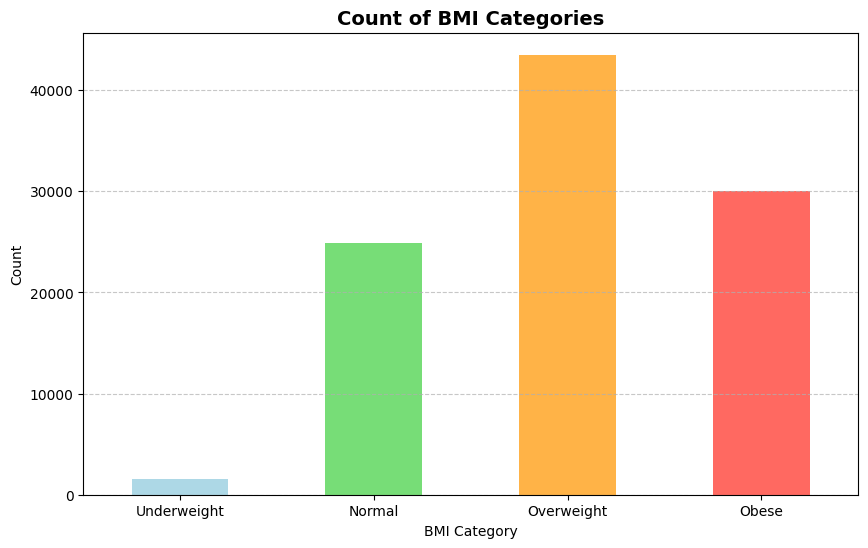

In [37]:
plt.figure(figsize=(10,6))
bmi_categories.plot(kind='bar',color=['#ADD8E6', '#77DD77', '#FFB347', '#FF6961'])
plt.title('Count of BMI Categories', fontsize=14, fontweight="bold")
plt.xticks(rotation=0, fontsize=10)
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)   

We will explore two different ways of using the BMI feature:

1. Raw values – Use the original continuous BMI values directly as a numeric feature.

2. Categorical labels – Convert BMI values into four categories:

    - Underweight

    - Normal weight

    - Overweight

    - Obese

Then apply One-Hot Encoding to transform these categories into numerical features.

Both approaches will be compared to evaluate which representation of BMI leads to better model performance

#### **HbA1c_level**

An A1C test measures the percentage of your red blood cells that have glucose-coated hemoglobin. High A1C levels are a sign of high blood glucose from diabetes. Diabetes can cause serious health problems, including heart disease, kidney disease, and nerve damage. 

![A1C](../hba1c.jpg)

In [ ]:
normal = df[df['hbA1c_level'] < 5.7].hbA1c_level.count()
caution = df[(df['hbA1c_level']>=5.7) & (df['hbA1c_level'] <=6.4)].hbA1c_level.count()
danger = df[df['hbA1c_level'] >= 6.5].hbA1c_level.count()
print("Normal : ",normal)
print("Caution : ",caution)
print("Danger : ",danger)

In [ ]:
HbA1c = pd.Series([normal, caution, danger], index=["Normal","Caution", "Danger" ])
HbA1c

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(HbA1c.index, HbA1c.values,color=['#77DD77', '#FFB347', '#FF6961'])
plt.title("HbA1c Distribution", fontsize=14, fontweight="bold")
plt.xlabel("HbA1c Level")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on the definition of the A1C test and our preprocessing of the data, we observe that a large portion of individuals fall into the prediabetic range. However, to gain deeper insights, we will further investigate the relationship between HbA1c levels and the actual classification of diabetes. In particular, we will examine whether individuals with an HbA1c value greater than 6.4% are consistently categorized as diabetic in the dataset.

#### **Blood glucose level**

In [ ]:
bgl = df["blood_glucose_level"].value_counts()
bgl

In [ ]:
normal = df[(df['blood_glucose_level'] >= 80) & (df['blood_glucose_level'] <= 140)].blood_glucose_level.count()
prediabetic = df[(df['blood_glucose_level'] > 140 ) & (df['blood_glucose_level'] < 200)].blood_glucose_level.count()
diabetic = df[df['blood_glucose_level'] >= 200].blood_glucose_level.count()

print("Normal: ", normal)
print("Prediabetic: ", prediabetic)
print("Diabetic : ", diabetic)

In [ ]:
blood_glucose = pd.Series([normal,prediabetic,diabetic], index=["Normal", "Prediabetic", "Diabetic"])
blood_glucose

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(blood_glucose.index, blood_glucose.values,color=['#77DD77', '#FFB347', '#FF6961'])
plt.title("Blood Glucose Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on the definition of blood glucose thresholds and our preprocessing of the data, we observe that a large portion of individuals fall into the prediabetic range. However, to gain deeper insights, we will further investigate the relationship between blood glucose levels and the actual classification of diabetes. In particular, we will examine whether individuals with a blood glucose level greater than 200 mg/dL are consistently categorized as diabetic in the dataset.

#### **Diabetes**

In [ ]:
diabetes = df["diabetes"].value_counts()
diabetes.index = ["Non-Diabetic", "Diabetic"]
diabetes

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(diabetes.index, diabetes.values,color=['#77DD77', '#FF6961'])
plt.title("Diabetes Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Diabetes Status")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We observe that the data is imbalanced between the two classes, Non-Diabetic and Diabetic. To address this and ensure that both classes are proportionally represented in the training and test sets, we will apply a stratified splitting strategy.